In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Problem Statement:
In this project, initially you need to preprocess the data and then develop an understanding of different features of the data by performing exploratory analysis and creating visualizations.Further, after having sufficient knowledge about the attributes you will perform a predictive task of classification to predict whether an individual makes over 50K a year or less,by using different Machine Learning Algorithms.
 Tasks to be done:
1.	Perform Exploratory Data Analysis to find key insights
a.	You have some “?” present in data. Replace “?” with NAN values.
b.	Check for null and duplicates.
c.	Check for Outliers

2.	Data Manipulation questions

a.	Extracting the “education” column and store it in “census_ed”
b.	Extracting all the columns from “age” to “relationship” and store it in “census_seq”.
c.	Extract the column number “0”, “5”, “6” and store it in “census_col”.
d.	Extracting all the male employees who work in state-gov and store it in “male_gov”.
e.	Extracting all Female employees who work in Private
f.	Extract all the 39 year olds who either have a bachelor's degree or who are native of the United States and store the result in “census_us”.
g.	 Getting the count of different levels of the “workclass” column.
h.	Here we are calculating the mean of capital gain on the bases of work class.
i.	Create a separate dataframe with the details of males and females from the census data that has income more than 50,000
j.	Checking % of people from US who earn <=50,000 anually and work under private.
k.	Calculating the percentage of married people in the census data.
l.	Calculatig the percentage of high school graduates earning more than 50,000 annually

3.	Use various machine learning algorithms to predict the response variable and compare their accuracies.
a.	Logistic Regression
b.	Decision Tree Classifier
c.	Random Forest Classifier

4.	Perform Linear Regression on following data:
#As per the question independent variable is “education.num”.
x=data[['education_num']]
#dependent variable is “hours.per.week”
y=data['hours_per_week']




In [ ]:
census = pd.read_csv("/content/census-income.csv")
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
pd.set_option("display.max_columns", None)
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#1.	Perform Exploratory Data Analysis to find key insights
#a.	You have some “?” present in data. Replace “?” with NAN values.
#b.	Check for null and duplicates.
#c.	Check for Outliers


In [ ]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#target column here is annual income
census['annual_income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
census = census.replace('?', 'NAN')
census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
census.apply(lambda x: x == 'NAN').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [ ]:
census.isna().sum().sum()

0

In [ ]:
census.duplicated().sum()

24

In [ ]:
census.drop_duplicates(inplace = True)

In [ ]:
census.duplicated().sum()

0

In [ ]:
census = census.dropna()
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


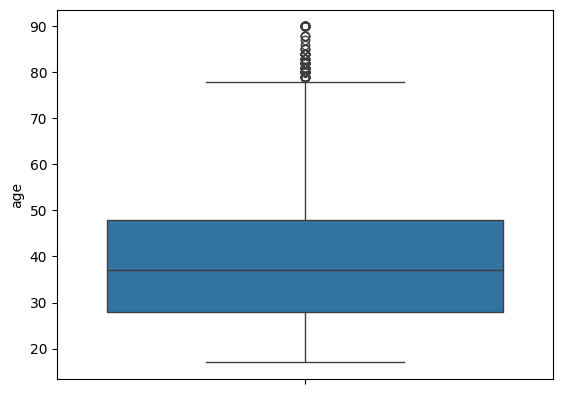

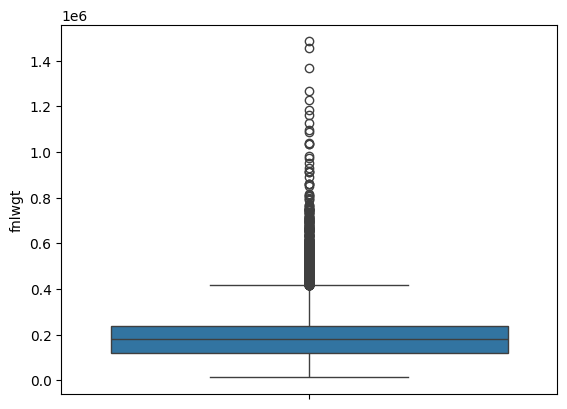

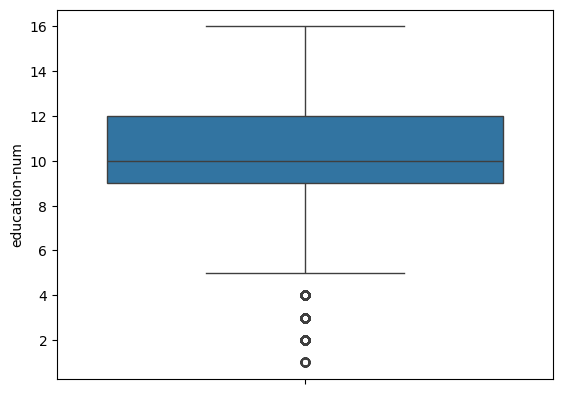

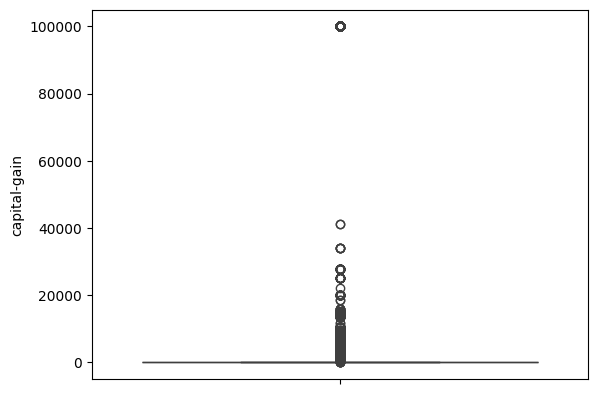

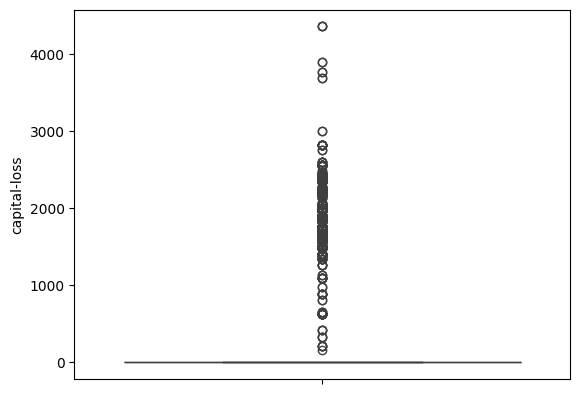

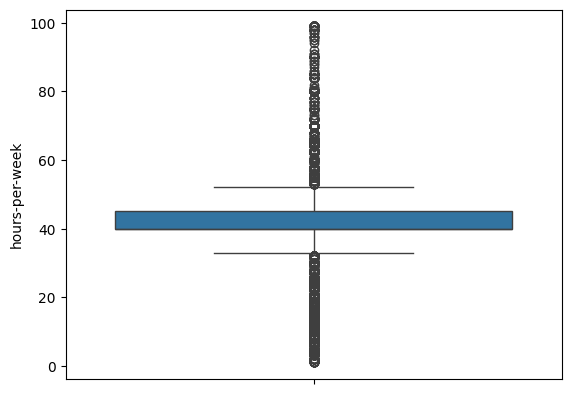

In [ ]:
for i in census.columns:
  if census[i].dtypes != object:
    sns.boxplot(census[i])
    plt.show()

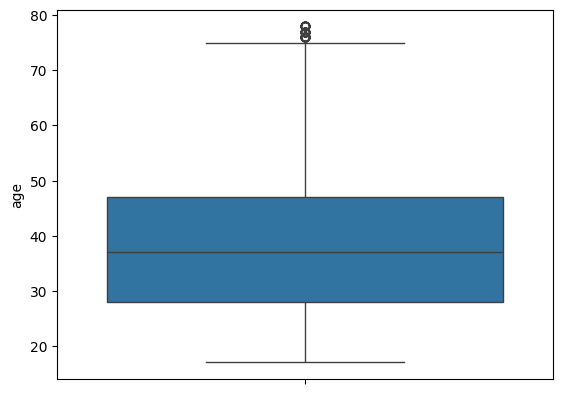

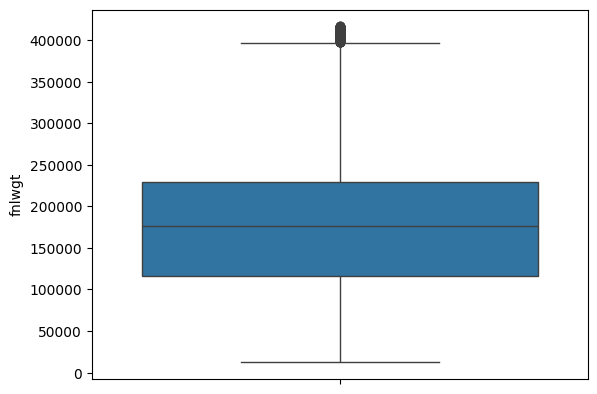

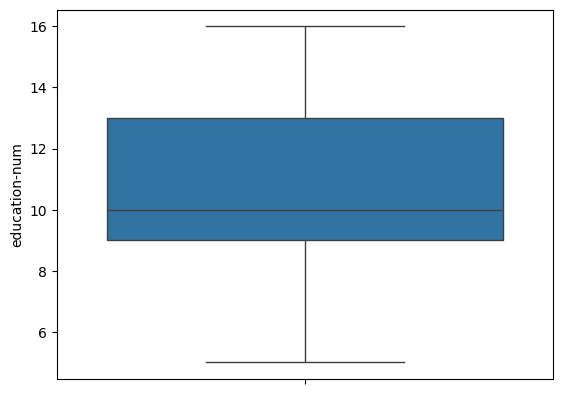

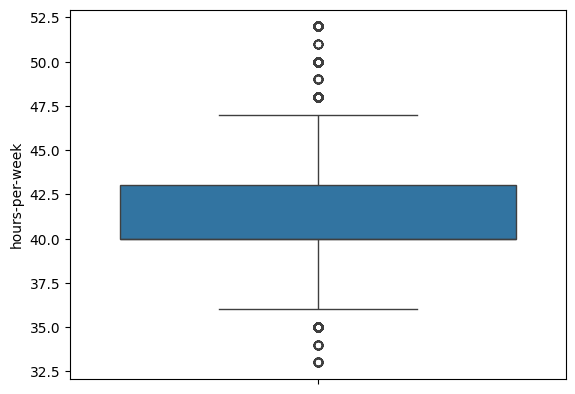

In [ ]:
column_names = ['age', 'fnlwgt', 'education-num', 'hours-per-week']
for i in column_names:
  Q1 = census[i].quantile(0.25)
  Q3 = census[i].quantile(0.75)
  IQR = Q3 - Q1
  census = census[(census[i] >= Q1 - 1.5 * IQR) & (census[i] <= Q3 + 1.5 * IQR)]
  sns.boxplot(census[i])
  plt.show()

In [ ]:
#2.	Data Manipulation questions

In [ ]:
#a.	Extracting the “education” column and store it in “census_ed”
census_ed = census["education"]
census_ed.head()

0    Bachelors
2      HS-grad
3         11th
4    Bachelors
5      Masters
Name: education, dtype: object

In [ ]:
#b.	Extracting all the columns from “age” to “relationship” and store it in “census_seq”.


In [ ]:
census.columns.get_loc("age")

0

In [ ]:
census.columns.get_loc("relationship")

7

In [ ]:
census_seq = census.iloc[:,:8]
census_seq.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife


In [ ]:
#c.	Extract the column number “0”, “5”, “6” and store it in “census_col”.

In [ ]:
census_col = census.iloc[:,[0,5,6]]
census_col.head()

,age,marital-status,occupation
0,39,Never-married,Adm-clerical
2,38,Divorced,Handlers-cleaners
3,53,Married-civ-spouse,Handlers-cleaners
4,28,Married-civ-spouse,Prof-specialty
5,37,Married-civ-spouse,Exec-managerial


In [ ]:
#d.	Extracting all the male employees who work in state-gov and store it in “male_gov”.

In [ ]:
#first i need to check if my data has male and state-gov or not
def use_only_str (series):
  return series.apply(lambda x: isinstance(x, str)).all()
series_column = census.columns [census.apply(use_only_str)]
series_column

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'annual_income'],
      dtype='object')

In [ ]:
census[series_column].apply (lambda x: x.str.lower() == 'male').sum()

workclass             0
education             0
marital-status        0
occupation            0
relationship          0
race                  0
sex               14988
native-country        0
annual_income         0
dtype: int64

In [ ]:
census[series_column].apply(lambda x: x.str.lower() == 'state-gov').sum()

workclass         957
education           0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
native-country      0
annual_income       0
dtype: int64

In [ ]:
male_gov = census[(census['sex'].str.lower()== 'male') & (census['workclass'].str.lower()== 'state-gov')]
male_gov.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
123,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
167,46,State-gov,102628,Masters,14,Widowed,Protective-serv,Unmarried,White,Male,0,0,40,United-States,<=50K


In [ ]:
#e.	Extracting all Female employees who work in Private
census.apply(lambda x:x == 'Private').sum()

age                   0
workclass         15802
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation            0
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
annual_income         0
dtype: int64

In [ ]:
census[(census ['sex'] == 'Female') & (census ['workclass'] == 'Private')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
43,49,Private,94638,HS-grad,9,Separated,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32534,37,Private,179137,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,39,United-States,<=50K
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


In [ ]:
#f.	Extract all the 39 year olds who either have a bachelor's degree or who are native of the United States and store the result in “census_us”.
census_us = census[(census['age'] >= 39) & (census['education'].str.lower() == 'bachelors')]
census_us.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
41,53,Self-emp-not-inc,88506,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


In [ ]:
#Getting the count of different levels of the “workclass” column
census['workclass'].value_counts()

workclass
Private             15802
Local-gov            1580
Self-emp-not-inc     1337
State-gov             957
NAN                   836
Federal-gov           788
Self-emp-inc          640
Without-pay             3
Never-worked            2
Name: count, dtype: int64

In [ ]:
#h.	Here we are calculating the mean of capital gain on the bases of work class.
census.groupby ('workclass')['capital-gain'].mean ()

workclass
Federal-gov          692.565990
Local-gov            947.547468
NAN                  701.638756
Never-worked           0.000000
Private              857.823440
Self-emp-inc        4176.904688
Self-emp-not-inc    2247.673897
State-gov            651.400209
Without-pay         1472.000000
Name: capital-gain, dtype: float64

In [ ]:
#i.	Create a separate dataframe with the details of males and females from the census data that has income more than 50,000
df = census[((census ['sex'].str.lower()== 'male')|(census['sex'].str.lower()=='female')) & (census['annual_income']=='>50K')]
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NAN,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
#j.	Checking % of people from US who earn <=50,000 anually and work under private.
census[(census['native-country'] == 'United-States') &
                     (census['annual_income'] == '<=50K') &
                     (census['workclass'].str.lower() == 'private')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
17,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


In [ ]:
#k.	Calculating the percentage of married people in the census data.
married = (census['marital-status'] == 'Married-civ-spouse').value_counts()
total = census['marital-status'].value_counts().sum()
percentage = (married[True]/total)*100
percentage

47.99726589200273

In [ ]:
#l.	Calculatig the percentage of high school graduates earning more than 50,000 annually
census[(census['education'].str.lower() == 'hs-grad') & (census['annual_income'] == '>50K')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
67,53,Private,169846,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K
86,49,Local-gov,268234,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
105,32,Self-emp-inc,317660,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,48,Self-emp-inc,185041,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,50,United-States,>50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,NAN,>50K
32518,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
#3.	Use various machine learning algorithms to predict the response variable and compare their accuracies.
#Logistics Regression
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder ()
for i in census.columns:
  if census[i].dtypes == object:
    census[i] = le.fit_transform (census[i])

In [ ]:
census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,7,77516,6,13,4,0,1,4,1,2174,0,40,39,0
2,38,4,215646,8,9,0,5,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,5,0,2,1,0,0,40,39,0
4,28,4,338409,6,13,2,10,5,2,0,0,0,40,4,0
5,37,4,284582,9,14,2,3,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,4,310152,11,10,4,11,1,4,1,0,0,40,39,0
32556,27,4,257302,4,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,8,9,2,6,0,4,1,0,0,40,39,1
32558,58,4,151910,8,9,6,0,4,4,0,0,0,40,39,0


In [ ]:
x= census.drop ('annual_income', axis =1)
y = census['annual_income']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,train_size = 0.8, random_state = 0)


In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression ()
log.fit (x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log.predict (x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score (y_test, y_pred)
accuracy

0.7751196172248804

In [ ]:
#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier ()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(x_test)
accuracy = accuracy_score (y_test, y_pred)
accuracy

0.7887901572112098

[Text(0.7210002037808227, 0.9871794871794872, 'x[7] <= 0.5\ngini = 0.388\nsamples = 17556\nvalue = [12939, 4617]'),
 Text(0.48883178097859165, 0.9615384615384616, 'x[4] <= 12.5\ngini = 0.498\nsamples = 7441\nvalue = [3948, 3493]'),
 Text(0.3425071904108389, 0.9358974358974359, 'x[10] <= 5095.5\ngini = 0.456\nsamples = 5203\nvalue = [3371, 1832]'),
 Text(0.2102282681694747, 0.9102564102564102, 'x[0] <= 36.5\ngini = 0.432\nsamples = 4922\nvalue = [3370, 1552]'),
 Text(0.05872149841591964, 0.8846153846153846, 'x[4] <= 9.5\ngini = 0.315\nsamples = 1760\nvalue = [1415, 345]'),
 Text(0.030067186541886882, 0.8589743589743589, 'x[11] <= 1794.0\ngini = 0.251\nsamples = 1095\nvalue = [934, 161]'),
 Text(0.01715433103629515, 0.8333333333333334, 'x[3] <= 5.5\ngini = 0.237\nsamples = 1075\nvalue = [927, 148]'),
 Text(0.005723129033199988, 0.8076923076923077, 'x[0] <= 29.5\ngini = 0.102\nsamples = 185\nvalue = [175, 10]'),
 Text(0.0035039565509387685, 0.782051282051282, 'x[12] <= 49.0\ngini = 0.18\n

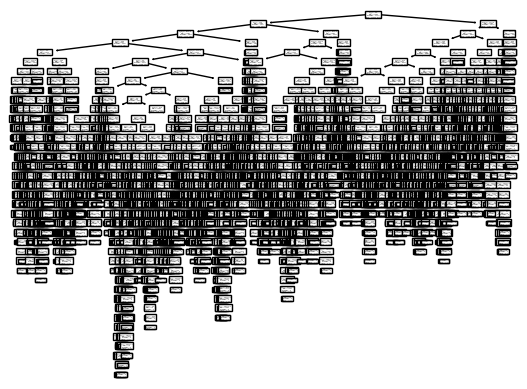

In [ ]:
from sklearn import tree
tree.plot_tree (dt)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
for i in range (100, 1000, 100):
  model = RandomForestClassifier (n_estimators = i)
  model.fit(x_train, y_train)
  y_pred = model.predict (x_test)
  accuracy = accuracy_score (y_test, y_pred)
  print (f"accuracy for {i} is {accuracy}")

accuracy for 100 is 0.8389154704944178
accuracy for 200 is 0.8400546821599453
accuracy for 300 is 0.8380041011619959
accuracy for 400 is 0.8398268398268398
accuracy for 500 is 0.8402825244930509
accuracy for 600 is 0.8380041011619959
accuracy for 700 is 0.836637047163363
accuracy for 800 is 0.8382319434951014
accuracy for 900 is 0.8377762588288904


In [ ]:
#4.	Perform Linear Regression on following data:
#linear regression
X = census['education-num']
Y = census['hours-per-week']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, train_size = 0.8, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit (X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))

LinearRegression()

In [ ]:
Y_pred = Lr.predict (X_test.values.reshape(-1,1))
from  sklearn.metrics import mean_squared_error
mean_squared_error (Y_test, Y_pred)


16.311342024319778

In [ ]:
r2_score = Lr.score (X_test.values.reshape(-1,1), Y_test.values.reshape(-1,1))
r2_score

0.022606736229099478